# Wir implementieren einen Hund-Katze Klassifikator mit CNNs

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import utils
import numpy as np
import cv2
import os

## Folgende Funktion nimmt ein Bild entgegen und skaliert das Bild auf 32x32 RGB-Pixel

In [3]:
def image_to_feature_vector(image, size=(32, 32)):
    return cv2.resize(image, size)

## Laden Sie die Daten aus der Übung 6 zu Neuronalen Netzen:

Schreiben Sie eine Funktion, die die Bilder einliest, mit Hilfe der Funktion image_to_feature_vector vorverarbeiten. Anschliessend sollen die Vektoren in eine data-Matrix geschrieben werden, 
und ein label-Vektor ist zu erzeugen. 



In [4]:
def gen_data(path):
    data = []
    labels = []

    imagePaths = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.jpg')]

    for (i, imagePath) in enumerate(imagePaths):
        image = cv2.imread(imagePath)
        label = os.path.basename(imagePath).split(".")[0]
        features = image_to_feature_vector(image)
        data.append(features)
        labels.append(label)
 
    return data, labels

In [6]:
data, labels= gen_data('...\\train')

le = LabelEncoder()
labels = le.fit_transform(labels)

## Splitten Sie die Daten in ein train/test-set.

Macht es Sinn die Daten zu normieren?

In [7]:
data = np.array(data) / 255.0
print(data.shape)
labels = utils.to_categorical(labels, 2)
print(labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

(25000, 32, 32, 3)
(25000, 2)


# Erstellen Sie ein CNN mit Keras

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation("softmax"))

model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 13, 13, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                    

# ... und starten Sie das Training

In [10]:
model.fit(X_train, y_train, epochs=25, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/25
147/147 [==============================] - 5s 26ms/step - loss: 0.6787 - accuracy: 0.5708 - val_loss: 0.6337 - val_accuracy: 0.6598
Epoch 2/25
147/147 [==============================] - 4s 27ms/step - loss: 0.6322 - accuracy: 0.6486 - val_loss: 0.6331 - val_accuracy: 0.6403
Epoch 3/25
147/147 [==============================] - 4s 26ms/step - loss: 0.5951 - accuracy: 0.6906 - val_loss: 0.5603 - val_accuracy: 0.7170
Epoch 4/25
147/147 [==============================] - 4s 26ms/step - loss: 0.5651 - accuracy: 0.7147 - val_loss: 0.6068 - val_accuracy: 0.6550
Epoch 5/25
147/147 [==============================] - 4s 27ms/step - loss: 0.5385 - accuracy: 0.7353 - val_loss: 0.5905 - val_accuracy: 0.6880
Epoch 6/25
147/147 [==============================] - 4s 27ms/step - loss: 0.5128 - accuracy: 0.7492 - val_loss: 0.5467 - val_accuracy: 0.7245
Epoch 7/25
147/147 [==============================] - 4s 26ms/step - loss: 0.4998 - accuracy: 0.7610 - val_loss: 0.5136 - val_accuracy: 0.7477

# Evaluieren Sie das Netz auf den held-back Test-Daten


Berechnen Sie die Akkuratheit

In [11]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

Loss: 0.4793, Accuracy: 0.7818


# Visualisieren der Filter

Visualisierung sie die gelernten Filter und diskutieren Sie die Ergebnisse

conv2d (3, 3, 3, 32)
(3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
(3, 3, 32, 32)


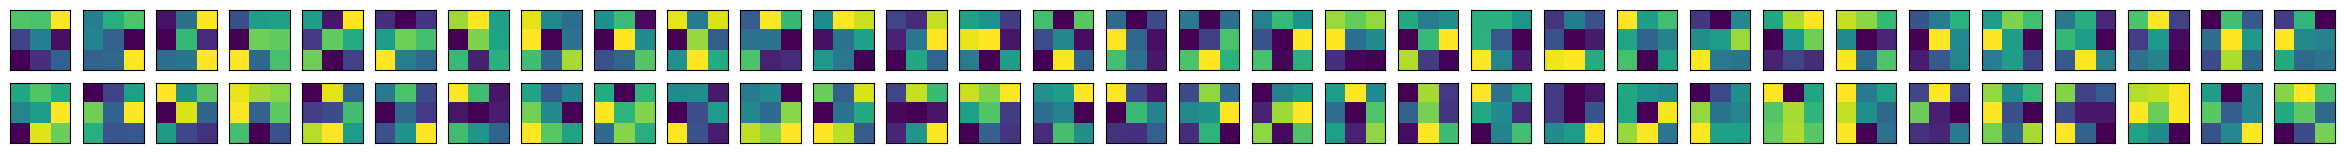

In [9]:
from matplotlib import pyplot

ix = 1
n_filters = 32
pyplot.figure(figsize = (30,30))

for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    print(filters.shape)
    for i in range(n_filters):
        f = filters[:, :, :, i]
        ax = pyplot.subplot(n_filters, 32, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, 0])
        ix += 1

In [10]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(X_test[10].reshape(1,32,32,3))
print(activations[1].shape)
print(activations[2].shape)
print(activations[3].shape)
print(activations[4].shape)
print(activations[5].shape)
print(activations[6].shape)
print(activations[7].shape)
print(activations[8].shape)
print(activations[9].shape)
print(activations[10].shape)
        
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*1.5))
    fig.tight_layout()    
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1
    plt.tight_layout()                

1/1 [==============================] - 0s 104ms/step
(1, 30, 30, 32)
(1, 15, 15, 32)
(1, 13, 13, 32)
(1, 13, 13, 32)
(1, 6, 6, 32)
(1, 1152)
(1, 64)
(1, 64)
(1, 64)
(1, 2)


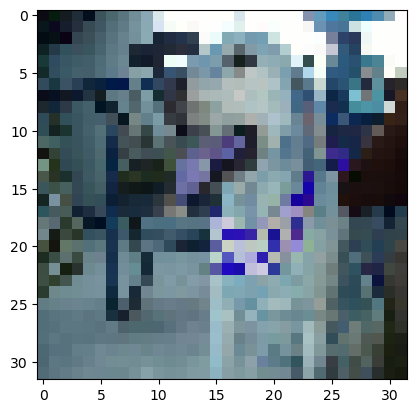

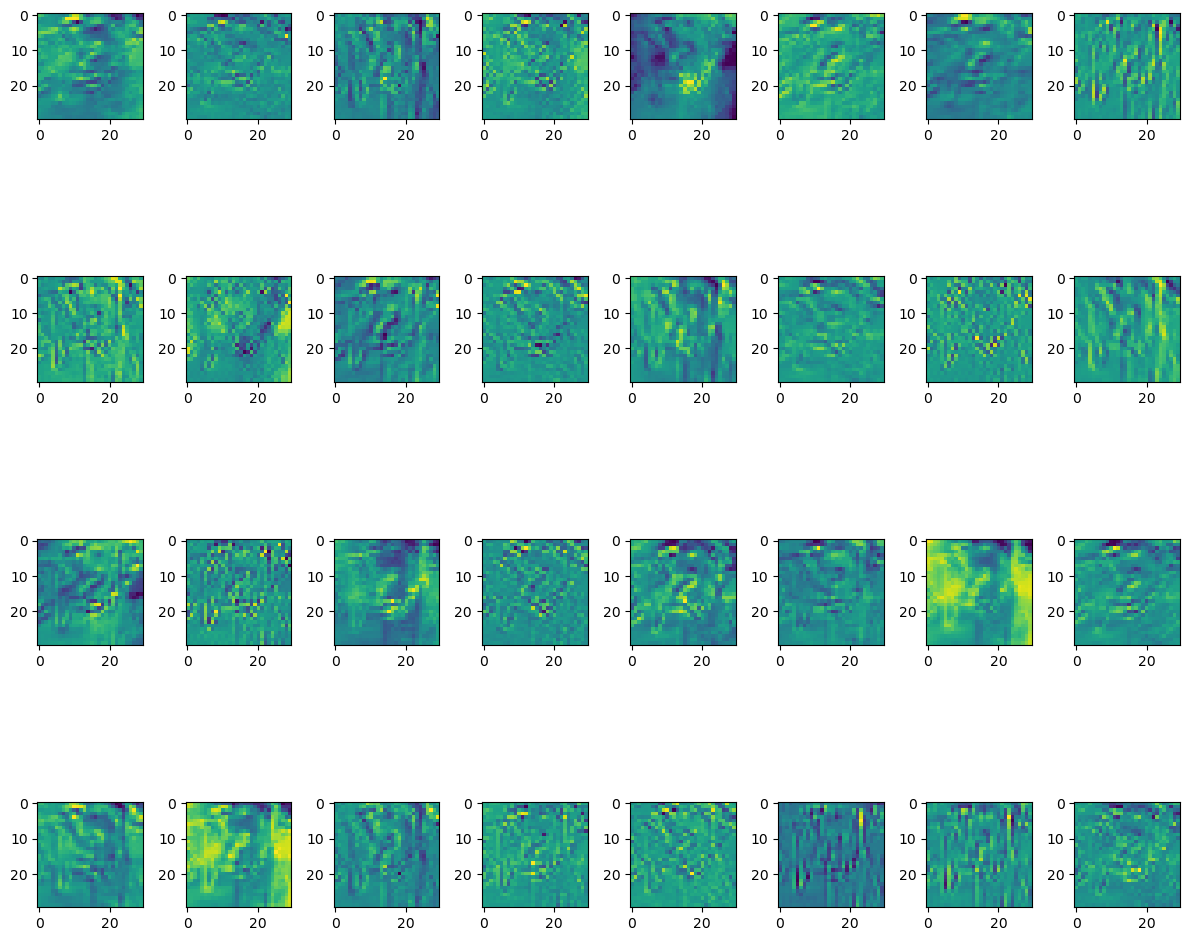

In [11]:
plt.imshow(X_test[10][:,:,:]);

display_activation(activations,8,4,0)

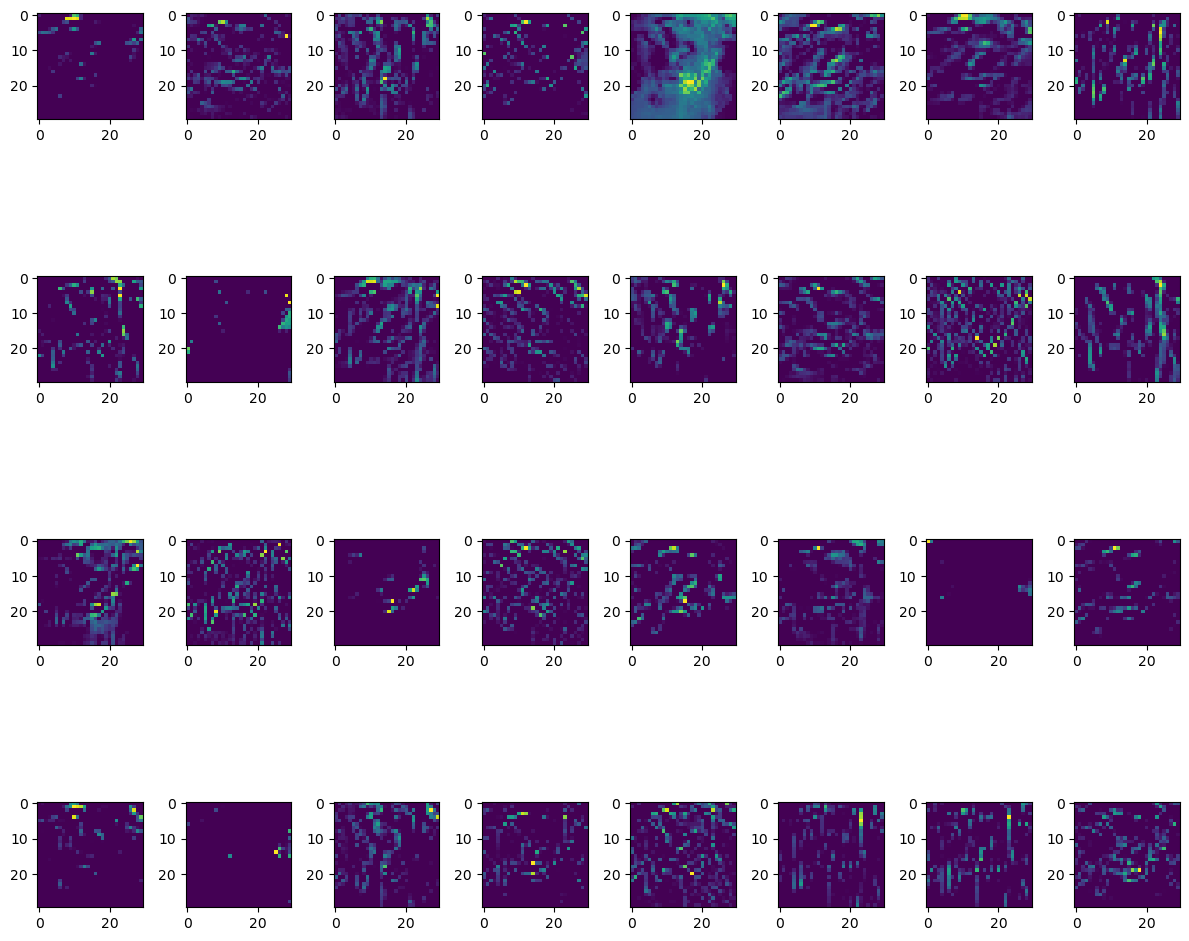

In [12]:
display_activation(activations,8,4,1)